# KPIs_criptos.ipynb

## Importar librerías

In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Función para calcular indicadores técnicos

In [85]:

def calcular_indicadores(df):
    delta = df['Close'].diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=14).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=14).mean()
    rs = gain / loss
    df['RSI'] = 100 - (100 / (1 + rs))
    
    ema12 = df['Close'].ewm(span=12, adjust=False).mean()
    ema26 = df['Close'].ewm(span=26, adjust=False).mean()
    df['MACD'] = ema12 - ema26
    df['Signal_MACD'] = df['MACD'].ewm(span=9, adjust=False).mean()
    
    ma20 = df['Close'].rolling(window=20).mean()
    std20 = df['Close'].rolling(window=20).std()
    df['Bollinger_Upper'] = ma20 + 2*std20
    df['Bollinger_Lower'] = ma20 - 2*std20
    
    low14 = df['Low'].rolling(window=14).min()
    high14 = df['High'].rolling(window=14).max()
    df['Stochastic'] = 100 * (df['Close'] - low14) / (high14 - low14)
    
    high = df['High']
    low = df['Low']
    close = df['Close']
    plus_dm = high.diff()
    minus_dm = low.diff().abs()
    plus_dm[plus_dm < 0] = 0
    minus_dm[minus_dm < 0] = 0
    tr1 = pd.DataFrame(high - low)
    tr2 = pd.DataFrame(abs(high - close.shift()))
    tr3 = pd.DataFrame(abs(low - close.shift()))
    tr = pd.concat([tr1, tr2, tr3], axis=1).max(axis=1)
    atr = tr.rolling(window=14).mean()
    plus_di = 100 * (plus_dm.rolling(window=14).mean() / atr)
    minus_di = 100 * (minus_dm.rolling(window=14).mean() / atr)
    dx = (abs(plus_di - minus_di) / (plus_di + minus_di)) * 100
    df['ADX'] = dx.rolling(window=14).mean()
    
    df['Media Móvil 30'] = df['Close'].rolling(window=30).mean()
    
    return df

# Cargar datos

In [86]:
ruta = '../static/data/procesados.csv'  
df = pd.read_csv(ruta, parse_dates=['Date'], index_col='Date')

# Limpiar posibles zonas horarias

In [87]:
if df.index.tz is not None:
    df.index = df.index.tz_localize(None)

# Ordenar índice por fecha

In [88]:
df = df.sort_index()

# Calcular indicadores

In [89]:
df = calcular_indicadores(df)

# Filtrar últimos 60 días

In [90]:
fecha_max = df.index.max()
fecha_min = fecha_max - pd.Timedelta(days=60)
df = df.loc[fecha_min:fecha_max]

print(f"Datos desde {df.index.min()} hasta {df.index.max()}")


Datos desde 2025-03-26 00:00:00 hasta 2025-05-25 00:00:00


# Visualizar KPIs básicos con gráficos

In [91]:
plt.figure(figsize=(14, 10))

<Figure size 1400x1000 with 0 Axes>

<Figure size 1400x1000 with 0 Axes>

# Precio de cierre y media móvil

## ¿Para qué sirve este KPI?
#### Suavizar la volatilidad: La media móvil elimina el ruido de las fluctuaciones diarias para mostrar la dirección general del mercado.

#### Identificar tendencias: Si el precio de cierre está por encima de la media móvil, puede indicar una tendencia alcista; si está por debajo, una tendencia bajista.

#### Confirmar señales: Se usa para confirmar movimientos y evitar señales falsas, ya que es un indicador rezagado (reacciona después de que el precio cambia).

#### Soportes y resistencias dinámicas: Las medias móviles pueden actuar como niveles de soporte o resistencia que el precio respeta o rompe.

Filtrando datos desde 2025-03-26 00:00:00 hasta 2025-05-25 00:00:00
Número de filas: 61


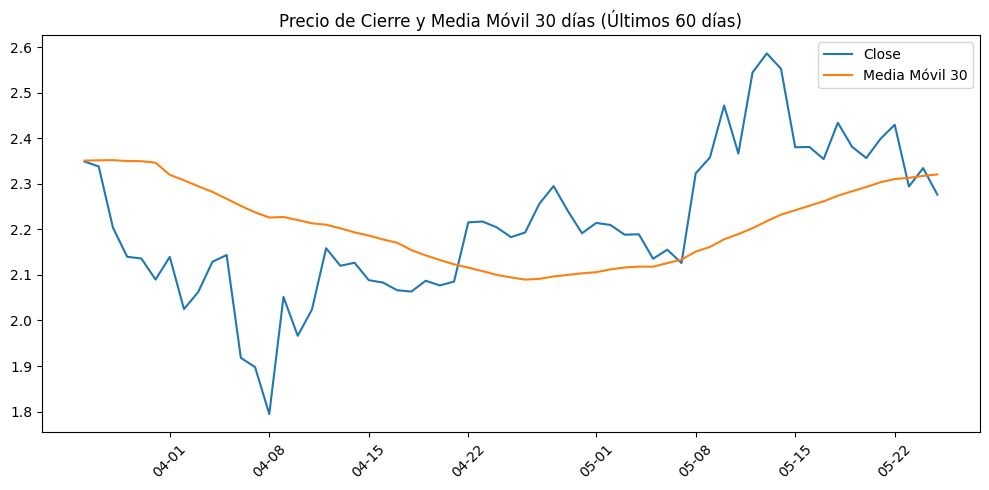

In [92]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

fecha_max = df.index.max()
fecha_min = fecha_max - pd.Timedelta(days=60)
df_filtrado = df.loc[fecha_min:fecha_max]

print(f"Filtrando datos desde {fecha_min} hasta {fecha_max}")
print(f"Número de filas: {len(df_filtrado)}")

if len(df_filtrado) == 0:
    print("No hay datos en el rango seleccionado.")
else:
    plt.figure(figsize=(10, 5))
    plt.plot(df_filtrado.index, df_filtrado['Close'], label='Close')
    plt.plot(df_filtrado.index, df_filtrado['Media Móvil 30'], label='Media Móvil 30')
    plt.title('Precio de Cierre y Media Móvil 30 días (Últimos 60 días)')
    plt.legend()

    ax = plt.gca()
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
    plt.xticks(rotation=45)

    plt.tight_layout()
    plt.show()



# RSI
## ¿Para qué sirve el RSI?
#### Mide el impulso del precio comparando la magnitud de las ganancias recientes con la de las pérdidas recientes en un período determinado (normalmente 14 días).

#### Indica si un activo está sobrecomprado o sobrevendido:

#### RSI por encima de 70 suele señalar que el activo está sobrecomprado, es decir, que su precio podría estar alto y podría venir una corrección a la baja.

#### RSI por debajo de 30 indica que el activo está sobrevendido, lo que puede señalar una oportunidad de compra o un posible rebote al alza.

#### Ayuda a identificar señales de cambio de tendencia y confirmar la fuerza de una tendencia existente.

#### Detecta divergencias entre el precio y el RSI, que pueden anticipar giros en el mercado.

(array([20179., 20186., 20193., 20200., 20209., 20216., 20223., 20230.]),
 [Text(20179.0, 0, '04-01'),
  Text(20186.0, 0, '04-08'),
  Text(20193.0, 0, '04-15'),
  Text(20200.0, 0, '04-22'),
  Text(20209.0, 0, '05-01'),
  Text(20216.0, 0, '05-08'),
  Text(20223.0, 0, '05-15'),
  Text(20230.0, 0, '05-22')])

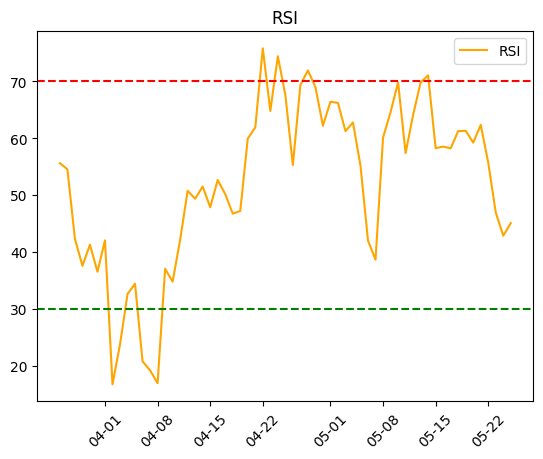

In [93]:
import matplotlib.dates as mdates

plt.subplot(1, 1, 1)
plt.plot(df_filtrado.index, df_filtrado['RSI'], label='RSI', color='orange')
plt.axhline(70, color='red', linestyle='--')
plt.axhline(30, color='green', linestyle='--')
plt.title('RSI')
plt.legend()

ax = plt.gca()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
plt.xticks(rotation=45)


# MACD y señal
## ¿Qué es el MACD?
#### El MACD se calcula restando dos medias móviles exponenciales (EMA) de diferente longitud, normalmente:

#### EMA de 12 períodos (rápida)

#### EMA de 26 períodos (lenta)

## La fórmula es:

## MACD=EMA(12)−EMA(26)

#### Esta diferencia muestra la convergencia o divergencia entre ambas medias móviles, reflejando cambios en el impulso del precio

## ¿Qué es la línea de señal (Signal)?

#### La línea de señal es una media móvil exponencial (normalmente de 9 períodos) del propio MACD. Se usa para generar señales de compra o venta cuando cruza la línea MACD.

## ¿Cómo se interpreta?

#### Cruce alcista: Cuando la línea MACD cruza la línea de señal desde abajo hacia arriba, indica una posible señal de compra o inicio de tendencia alcista.

#### Cruce bajista: Cuando la línea MACD cruza la línea de señal desde arriba hacia abajo, indica una posible señal de venta o inicio de tendencia bajista.

#### Histograma: Representa la diferencia entre el MACD y la línea de señal, mostrando visualmente la fuerza del impulso.

## ¿Para qué sirve el MACD?

#### Medir la fuerza y dirección de la tendencia: Ayuda a identificar si la tendencia es alcista o bajista y su intensidad.

#### Detectar puntos de entrada y salida: Los cruces entre MACD y señal son usados para tomar decisiones de compra o venta.

#### Confirmar señales de otros indicadores: Se suele usar junto con RSI u otros indicadores para validar señales.

(array([20179., 20186., 20193., 20200., 20209., 20216., 20223., 20230.]),
 [Text(20179.0, 0, '04-01'),
  Text(20186.0, 0, '04-08'),
  Text(20193.0, 0, '04-15'),
  Text(20200.0, 0, '04-22'),
  Text(20209.0, 0, '05-01'),
  Text(20216.0, 0, '05-08'),
  Text(20223.0, 0, '05-15'),
  Text(20230.0, 0, '05-22')])

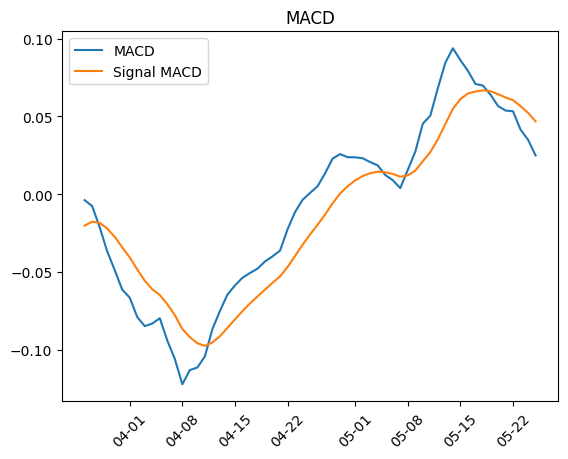

In [94]:
import matplotlib.dates as mdates

plt.subplot(1, 1, 1)
plt.plot(df_filtrado.index, df_filtrado['MACD'], label='MACD')
plt.plot(df_filtrado.index, df_filtrado['Signal_MACD'], label='Signal MACD')
plt.title('MACD')
plt.legend()

ax = plt.gca()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
plt.xticks(rotation=45)

# Bandas de Bollinger
## ¿Qué son las Bandas de Bollinger?

#### Consisten en tres líneas trazadas sobre el gráfico de precios:

#### Banda media: una media móvil simple (SMA), generalmente de 20 períodos, que representa el valor promedio del precio en ese intervalo.

#### Banda superior: se calcula sumando a la banda media dos desviaciones estándar del precio, reflejando un nivel estadísticamente alto.

#### Banda inferior: se calcula restando a la banda media dos desviaciones estándar del precio, reflejando un nivel estadísticamente bajo.

#### Estas bandas se expanden o contraen según la volatilidad del mercado: cuando la volatilidad aumenta, las bandas se separan; cuando disminuye, se acercan.

## ¿Para qué sirven?

#### Medir la volatilidad: La distancia entre las bandas indica la volatilidad actual del activo. Bandas estrechas sugieren baja volatilidad y posible consolidación, mientras que bandas anchas indican alta volatilidad y movimientos fuertes.

#### Identificar condiciones de sobrecompra y sobreventa: Cuando el precio toca o supera la banda superior, puede indicar que el activo está sobrecomprado (posible corrección a la baja). Cuando toca o cae por debajo de la banda inferior, puede estar sobrevendido (posible rebote al alza).

#### Detectar posibles cambios de tendencia: La expansión de las bandas puede anticipar el inicio de una nueva tendencia, mientras que su estrechamiento suele indicar un período de consolidación o rango lateral.

#### Soportes y resistencias dinámicas: Las bandas superior e inferior pueden actuar como niveles de soporte y resistencia sobre los que el precio rebota.

(array([20179., 20186., 20193., 20200., 20209., 20216., 20223., 20230.]),
 [Text(20179.0, 0, '04-01'),
  Text(20186.0, 0, '04-08'),
  Text(20193.0, 0, '04-15'),
  Text(20200.0, 0, '04-22'),
  Text(20209.0, 0, '05-01'),
  Text(20216.0, 0, '05-08'),
  Text(20223.0, 0, '05-15'),
  Text(20230.0, 0, '05-22')])

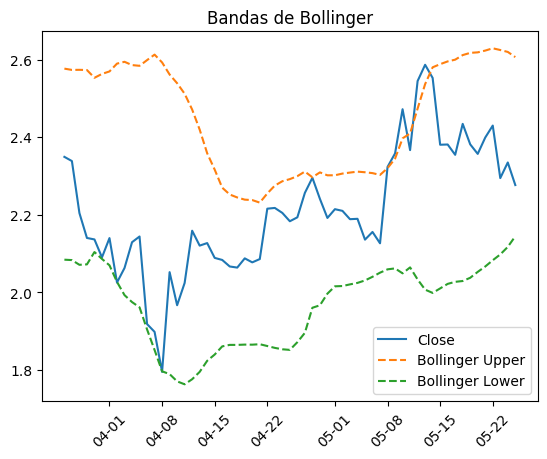

In [95]:
plt.subplot(1, 1, 1)
plt.plot(df_filtrado.index, df_filtrado['Close'], label='Close')
plt.plot(df_filtrado.index, df_filtrado['Bollinger_Upper'], label='Bollinger Upper', linestyle='--')
plt.plot(df_filtrado.index, df_filtrado['Bollinger_Lower'], label='Bollinger Lower', linestyle='--')
plt.title('Bandas de Bollinger')
plt.legend()

ax = plt.gca()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
plt.xticks(rotation=45)

# ADX
## ¿Para qué sirve el ADX?

#### Mide la fuerza de la tendencia: El ADX ayuda a saber si el mercado está en tendencia (fuerte) o en rango (débil o lateral), pero no indica la dirección de la tendencia, solo su intensidad.

#### Identifica momentos de operar: Un ADX alto (por encima de 25) suele indicar que hay una tendencia fuerte y, por tanto, puede ser buen momento para seguir la tendencia. Un ADX bajo (por debajo de 20-25) sugiere que el mercado está lateral y no hay una tendencia clara.

#### Complementa otros indicadores: El ADX suele usarse junto a otros indicadores, como el MACD o el RSI, para confirmar señales y aumentar la fiabilidad de las decisiones de trading.

## ¿Cómo se calcula?

#### El ADX se deriva de dos líneas auxiliares:

#### +DI (Indicador Direccional Positivo): mide la fuerza de los movimientos alcistas.

#### -DI (Indicador Direccional Negativo): mide la fuerza de los movimientos bajistas.

#### El ADX es una media suavizada de la diferencia absoluta entre +DI y -DI, normalizada entre 0 y 100

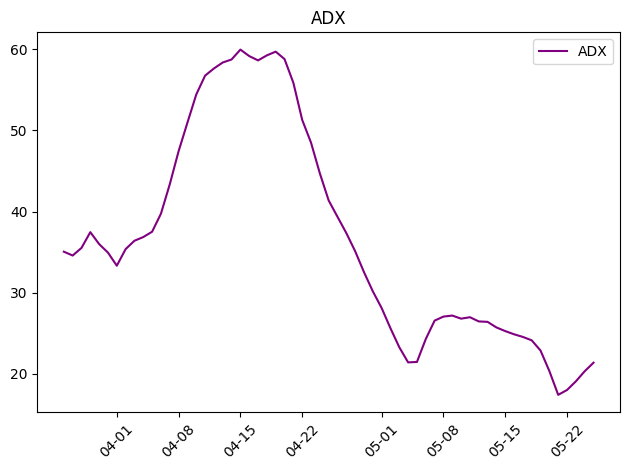

In [96]:
import matplotlib.dates as mdates

plt.subplot(1, 1, 1)
plt.plot(df_filtrado.index, df_filtrado['ADX'], label='ADX', color='purple')
plt.title('ADX')
plt.legend()

ax = plt.gca()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

## En el análisis técnico para trading, la selección de KPIs (Key Performance Indicators) adecuados es fundamental para evaluar el comportamiento del mercado y tomar decisiones informadas. Los KPIs elegidos combinan indicadores de tendencia, impulso, volatilidad y fuerza de la tendencia, permitiendo un análisis integral y balanceado del activo.

### Justificación de la selección de KPIs

#### Análisis técnico como base estratégica
#### El análisis técnico se fundamenta en estudiar el comportamiento histórico del precio y volumen para anticipar movimientos futuros del mercado. Los KPIs seleccionados son herramientas estadísticas que permiten detectar tendencias, señales de compra/venta y condiciones de mercado, facilitando la sincronización y gestión de riesgos.

### Complementariedad y confirmación

### Ningún indicador por sí solo es infalible. Por ello, se escogieron KPIs que se complementan:

### Indicadores de tendencia (Media Móvil, MACD, ADX) para identificar dirección y fuerza.

#### Indicadores de impulso y condiciones extremas (RSI, Bandas de Bollinger) para detectar sobrecompra/sobreventa y posibles reversiones.
#### Esta combinación mejora la fiabilidad de las señales y evita decisiones basadas en información parcial.

### Medición de diferentes dimensiones del mercado

### Precio y tendencia: Precio de cierre y media móvil suavizan la información para identificar la dirección general.

### Impulso: RSI y MACD miden la fuerza y velocidad del movimiento del precio.

#### Volatilidad: Bandas de Bollinger reflejan la variabilidad del precio y posibles niveles extremos.

#### Fuerza de la tendencia: ADX cuantifica la intensidad de la tendencia, ayudando a distinguir entre mercados en tendencia o laterales

### Facilidad de interpretación y aplicación práctica

#### Estos KPIs son ampliamente usados y reconocidos en la comunidad de trading, cuentan con metodologías claras y permiten una interpretación directa para la toma de decisiones, facilitando su integración en estrategias de trading.